In [1]:
#Using yfinance library to read stocks
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import pandas_datareader
import scipy.stats as st
import matplotlib.dates as mdates
import seaborn as sns
import os

In [2]:
#Create list of stock tickers
symbols = ['FDX', 'UPS', 'TGT','GM','TM','LUV','DAL','TWTR','FB','WMT']
#stockfinal= pd.read_csv("outputData/stocks.csv")
stockfinal=pd.DataFrame()
stock=[]
# I've converted the function to use variables for the dates
# This way you can comment/uncomment the time period you want to graph
# and everything will change in the titles and file names
#Entire time period
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,12,31)

#2019 only
# start = datetime.datetime(2019,1,1)
# end = datetime.datetime(2019,12,31)

# 2020 only
# start = datetime.datetime(2020,1,1)
# end = datetime.datetime(2020,12,31)

# Pre-covid 2020
# start = datetime.datetime(2020,1,1)
# end = datetime.datetime(2020,3,1)

# Post-covid 2020
# start = datetime.datetime(2020,3,1)
# end = datetime.datetime(2020,12,31)

# This converts the datetime info into string format for use in titles and 
# file names.
startString = start.strftime("%d %B %Y")
endString = end.strftime("%d %B %Y")
#startString2 = start.strftime("%Y-%m-%1")

# The program crashes if the directory already exists (as I found out in testing)
# so I added a try statement.  If the directory doesn't exist, it makes one
# if it exists, it moves on
# the directory name is start date - end date for that series of graphs
try:
    os.mkdir(f'{startString} - {endString}')
except:
    pass
#Read stocks in symols list, add to data frame
# This is the first place we use the start/end variables to define the download period
for ticker in symbols:
    stock=yf.download(ticker, start=start, end=end)
    if len(stock)!=0:
        stock["Name"]=ticker
        stockfinal=stockfinal.append(stock, sort=False)
#write data frame to csv file in a directory that is named for the time period
stockfinal.to_csv(f'{startString} - {endString}/Stocks from {startString} to {endString}.csv', encoding = 'utf-8')
#startString2

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#create new data frame grouped by ticker name and calculate common describe() statistics elements
stock_group=stockfinal.groupby("Name")
stock_describe=stock_group["Close"].describe()
stock_describe

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
DAL,504.0,45.129881,13.342683,19.190001,31.199999,50.330000,57.187500,63.160000
FB,504.0,208.017579,39.598348,131.740005,179.985001,196.760002,235.744995,303.910004
FDX,504.0,176.419246,46.649264,90.489998,151.082500,163.309998,184.032497,301.450012
GM,504.0,34.000179,6.110743,16.799999,29.827500,35.840000,38.437500,46.459999
LUV,504.0,46.537341,9.122355,23.870001,38.265000,50.425001,53.852499,58.540001
TGT,504.0,112.107957,29.655817,65.529999,86.197500,110.540001,125.820002,179.820007
TM,504.0,130.135397,8.756029,108.500000,122.907503,129.389999,136.574997,155.089996
TWTR,504.0,36.362024,6.372567,22.000000,31.607501,35.765001,40.360001,55.869999
UPS,504.0,120.197064,24.729566,86.169998,102.074997,114.375000,121.247498,176.539993


In [4]:
#Find min and max of each ticker
mins=stock_group["Close"].min()
maxs=stock_group["Close"].max()
#create data frame to keep rows of min and max for each ticker
mins_data=pd.DataFrame()
maxs_data=pd.DataFrame()
#Reset data frme index since the initial index is on date but in order to find correct date of ticker, date column should be as regular column
stockfinal=stockfinal.reset_index()
for ticker in symbols:
    mins_data=mins_data.append(stockfinal[(stockfinal["Name"]==ticker) & (stockfinal["Close"]==mins[ticker])])
    maxs_data=maxs_data.append(stockfinal[(stockfinal["Name"]==ticker) & (stockfinal["Close"]==maxs[ticker])])
#Show info for mins of each ticker
mins_data

,Date,Open,High,Low,Close,Adj Close,Volume,Name
302,2020-03-16,92.000000,99.870003,90.489998,90.489998,89.600357,4417400,FDX
804,2020-03-12,82.220001,92.440002,82.000000,86.169998,84.222221,9412800,UPS
1009,2019-01-03,66.129997,66.629997,65.410004,65.529999,62.248390,4562200,TGT
1816,2020-03-18,18.830000,19.049999,14.330000,16.799999,16.799999,39591100,GM
2318,2020-03-16,110.000000,112.510002,108.010002,108.500000,106.602600,409400,TM
2865,2020-05-15,24.370001,24.870001,23.750000,23.870001,23.870001,18679800,LUV
3369,2020-05-15,18.969999,19.650000,18.620001,19.190001,19.190001,46861800,DAL
3832,2020-03-18,22.950001,23.490000,20.000000,22.000000,22.000000,31012700,TWTR
4033,2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900,FB
4537,2019-01-03,93.209999,94.709999,92.699997,92.860001,89.522263,8277300,WMT


In [5]:
#Show info for maxs of each ticker
maxs_data

,Date,Open,High,Low,Close,Adj Close,Volume,Name
488,2020-12-08,298.000000,303.649994,297.720001,301.450012,300.776428,2889100,FDX
952,2020-10-12,174.860001,176.800003,174.210007,176.539993,175.469986,2274000,UPS
1488,2020-11-25,177.729996,180.479996,177.350006,179.820007,179.820007,3780700,TGT
1991,2020-11-24,45.910000,46.709999,45.070000,46.459999,46.459999,20048700,GM
2510,2020-12-16,154.160004,155.479996,153.000000,155.089996,155.089996,266100,TM
2801,2020-02-13,58.060001,58.689999,57.849998,58.540001,58.315563,2401800,LUV
3158,2019-07-16,61.880001,63.259998,61.720001,63.160000,61.866245,10319700,DAL
3164,2019-07-24,62.389999,63.439999,62.380001,63.160000,62.263969,5718800,DAL
4024,2020-12-18,54.930000,56.080002,54.270000,55.869999,55.869999,20450300,TWTR
4448,2020-08-26,284.000000,304.670013,284.000000,303.910004,303.910004,69015200,FB


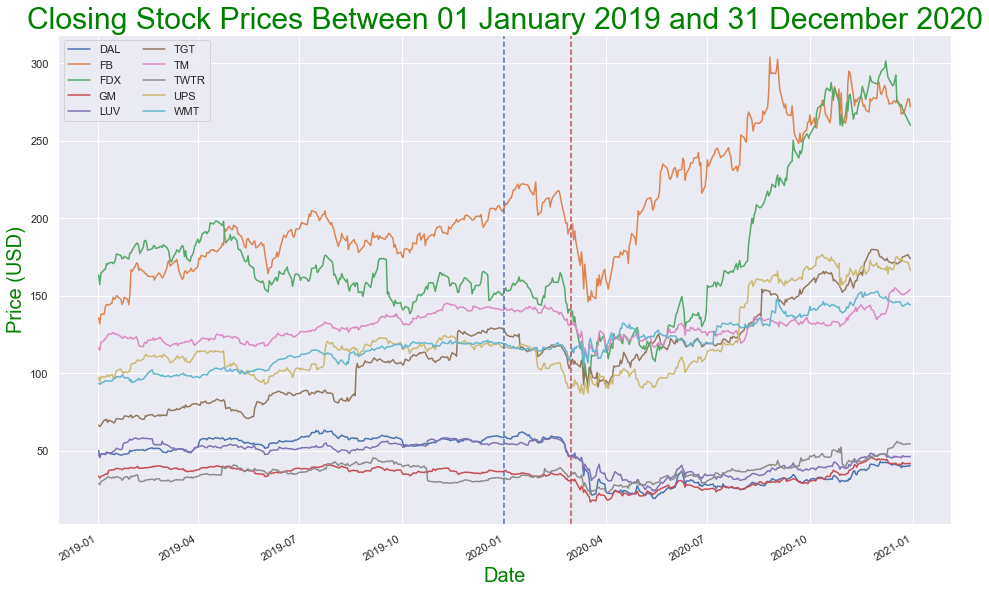

In [6]:
#Create a comparable plot for all tickers in data frame 
sns.set()
allTick = plt.figure(figsize=(16, 10))
stock_group["Close"].plot()
if (startString == '01 January 2019' and endString == '31 December 2020') or \
(startString == '01 January 2020' and endString == '31 December 2020') or \
(startString == '01 January 2020' and endString == '01 March 2020'):
    plt.axvline(x='2020-3-1',color='r',linestyle='--')
    plt.axvline(x='2020-1-1',color='b',linestyle='--')
plt.ylabel('Price (USD)', fontsize =20, color = 'green')
plt.xlabel('Date', fontsize =20, color = 'green')
plt.legend(ncol=2)
plt.title(f'Closing Stock Prices Between {startString} and {endString}',fontsize=30, color="green") 
title =(f'Closing Stock Prices Between {startString} and {endString}')
plt.show()
# saves directory to dd-Month-YYYY - dd-Month-YYYY/closing stock prices between dd Month YYYY and dd Month YYYY.csv
allTick.savefig(f'{startString} - {endString}/{title}.png')

In [7]:
#create function to claculate linear regression, draw plot, draw linear regression for each couple of tickers
def linear_reg(x,y,dfName, dfName1):
    sns.set()
    ticker_df = stockfinal[stockfinal["Name"] == str(dfName)]
    ticker_df1 = stockfinal[stockfinal["Name"] == str(dfName1)]
    date_num = ticker_df[x].map(datetime.datetime.toordinal)
    slope, intercept, r_value, p_value, std_err = st.linregress(date_num,ticker_df[y])
    slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(date_num,ticker_df1[y])
    regression_value = date_num * slope + intercept
    regression_value1 = date_num * slope1 + intercept1
    twoTick = plt.figure(figsize=(20, 10))
    plt.plot(ticker_df[x], ticker_df[y])
    plt.plot(ticker_df1[x], ticker_df1[y])
    plt.plot(ticker_df[x], regression_value, color = 'red')
    plt.plot(ticker_df1[x], regression_value1, color = 'purple')
    eq = f"{(dfName)} y = {round(slope, 2)}x + {round(intercept, 2)}"
    eq1 = f"{(dfName1)} y = {round(slope1, 2)}x + {round(intercept1, 2)}"

#   I replaced hard coded dates with variables. This allows rapid changing of the data set
#   and also ensures the proper data file names and graph titles
#   ab=(mdates.date2num(dt.datetime(2019,3,1)), (ticker_df[y].mean()))
#   ab1=(mdates.date2num(dt.datetime(2019,3,1)), (ticker_df1[y].mean()))
    ab = (mdates.date2num(start), (ticker_df[y].mean()))
    ab1 =(mdates.date2num(start), (ticker_df1[y].mean()))
    # Define the linear regression equation colors and size
    plt.annotate(eq,ab, color='red', fontsize = 16)
    plt.annotate(eq1,ab1, color='purple', fontsize = 16)
    # Define graph labels, size and color
    plt.xlabel(x, fontsize = 20, color = 'green')
    plt.ylabel(y, fontsize = 20, color = 'green')
    # Plot the legend
    plt.legend([dfName, dfName1])
    
    # Set the title of the graph, also used in the file name  Format is 
    # 
    t = f"Plot for {dfName} and {dfName1} between {startString} and {endString}"
    plt.title(t, fontsize = 30, color = 'green')
    plt.show()
    print(f"For {dfName} the r-value is: {r_value} and p-value is: {p_value}")
    print(f"For {dfName1} the r-value is: {r_value1} and p-value is: {p_value1}")

    #   Define the file name using start/end dates + title.png 
    twoTick.savefig(f'{startString} - {endString}/{t}.png')

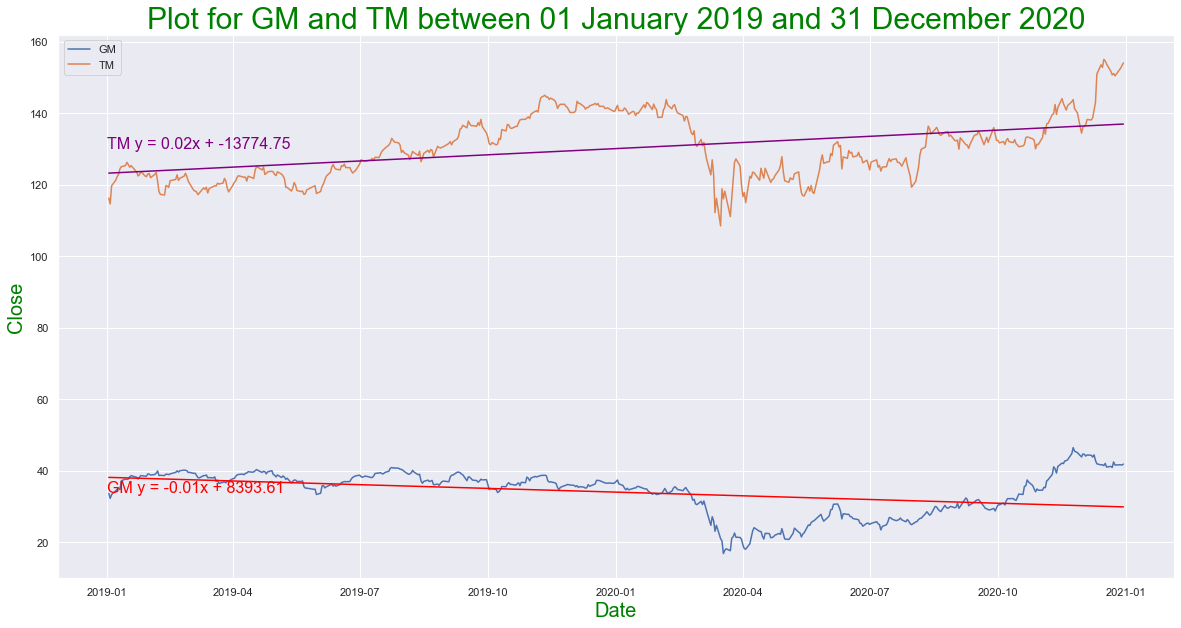

For GM the r-value is: -0.3910429251917477 and p-value is: 7.31523577582102e-20
For TM the r-value is: 0.45393365010143344 and p-value is: 5.475339457043264e-27


In [8]:
#Linear regression for GM and TM
linear_reg("Date", "Close", "GM", "TM")

# the regression equation rarely ends up in an optimal spot
# because we're using a function to plot these graphs.

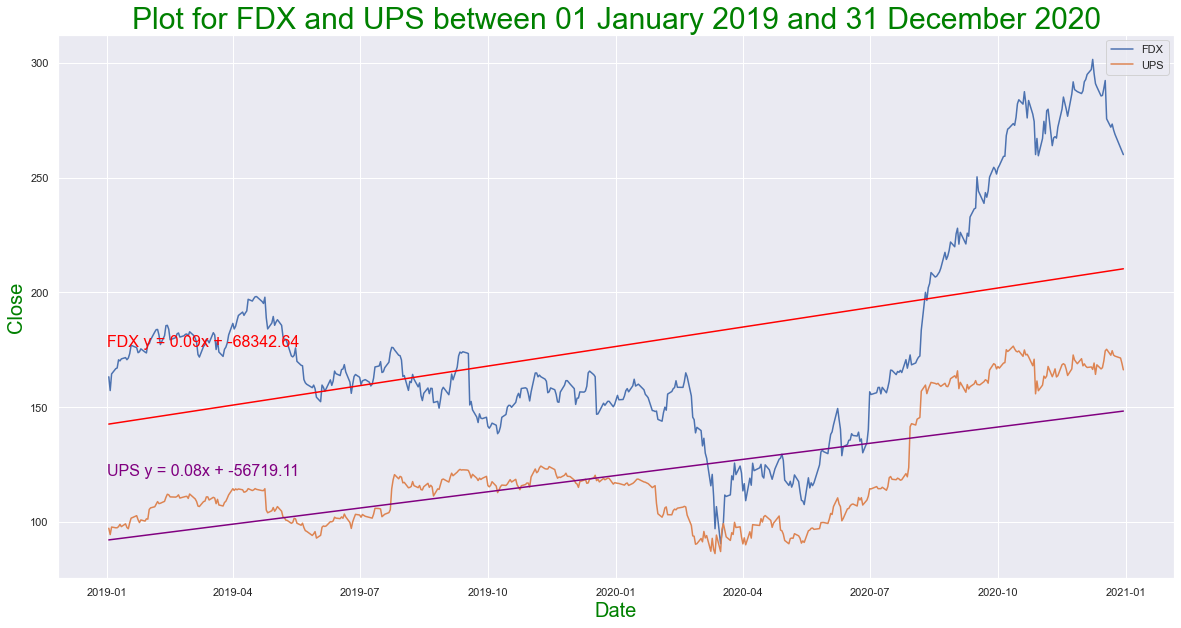

For FDX the r-value is: 0.41985448556986893 and p-value is: 6.09972666406229e-23
For UPS the r-value is: 0.6569986630989886 and p-value is: 1.3860879504405303e-63


In [9]:
#Linear regression for FDX and UPS
linear_reg("Date", "Close", "FDX", "UPS")

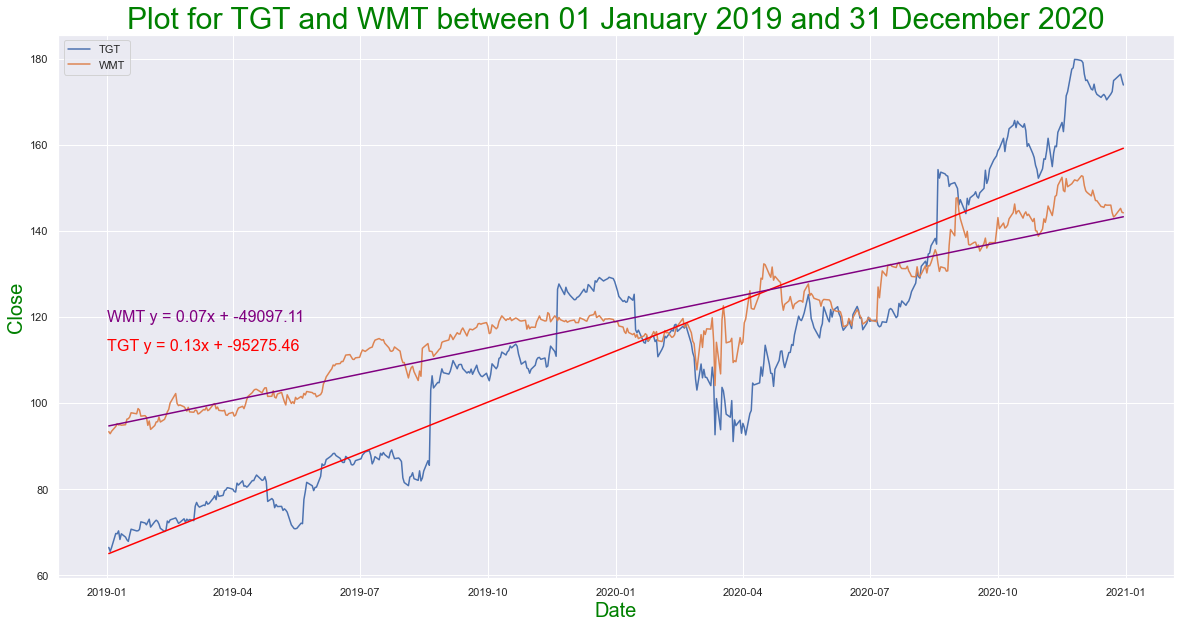

For TGT the r-value is: 0.9194202893388882 and p-value is: 1.3367257614407573e-205
For WMT the r-value is: 0.9397228373123839 and p-value is: 4.161699355680652e-236


In [10]:
#Linear regression for TGT and WMT
linear_reg("Date", "Close", "TGT", "WMT")

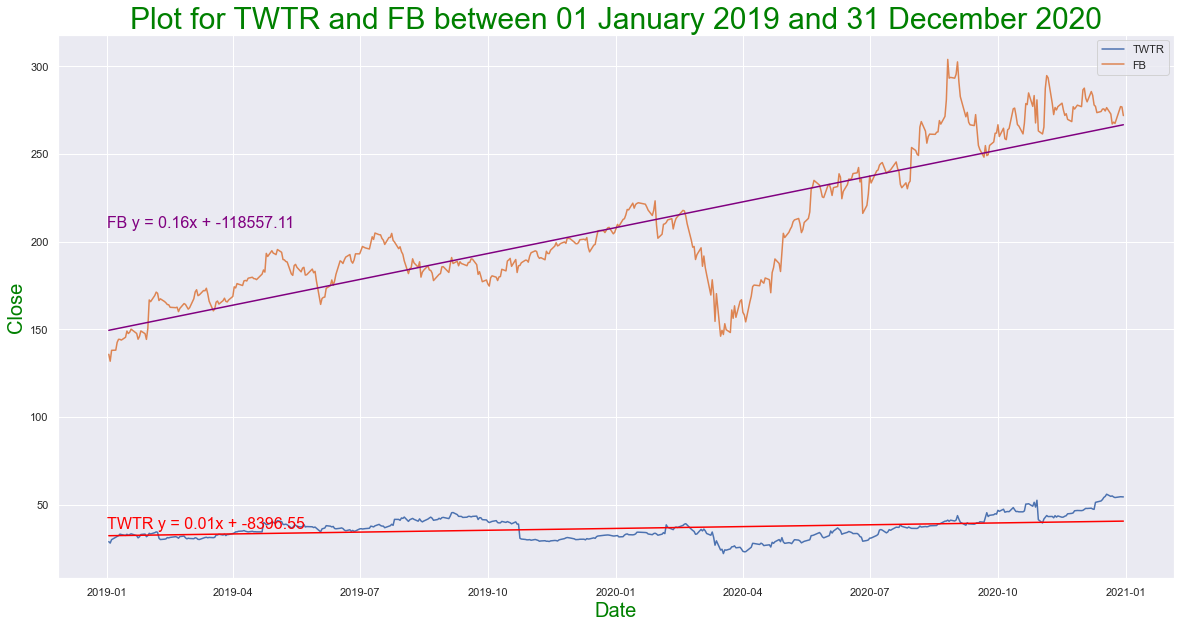

For TWTR the r-value is: 0.37826422486370753 and p-value is: 1.3679935708197074e-18
For FB the r-value is: 0.8573222282032655 and p-value is: 7.113035142287852e-147


In [11]:
#Linear regression for TWTR and FB
linear_reg("Date", "Close", "TWTR","FB")

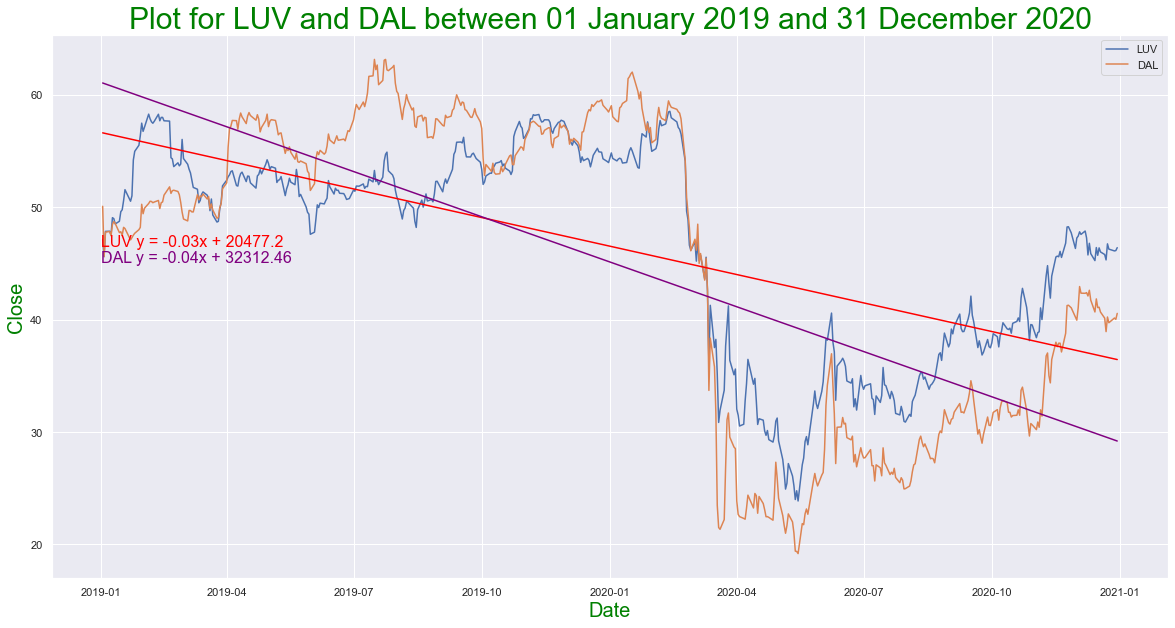

For LUV the r-value is: -0.6401883390286672 and p-value is: 1.807338530880926e-59
For DAL the r-value is: -0.6912768580169779 and p-value is: 7.491008304478766e-73


In [12]:
#Linear regression for LUV and DAL
linear_reg("Date", "Close", "LUV","DAL")

In [13]:
stocksbydate = stockfinal.pivot_table(index=['Date'], columns="Name", values="Close")
stocksbydate

Name,DAL,FB,FDX,GM,LUV,TGT,TM,TWTR,UPS,WMT
Date,,,,,,,,,,
2019-01-02,50.090000,135.679993,163.190002,33.639999,47.139999,66.440002,116.279999,28.809999,97.209999,93.339996
2019-01-03,45.610001,131.740005,157.190002,32.250000,45.610001,65.529999,114.650002,27.990000,94.449997,92.860001
2019-01-04,47.790001,137.949997,164.429993,33.330002,47.860001,66.430000,119.730003,29.950001,97.739998,93.440002
2019-01-07,47.849998,138.050003,166.729996,34.360001,47.869999,69.680000,121.279999,31.340000,97.410004,94.540001
2019-01-08,47.470001,142.529999,167.020004,34.810001,47.540001,69.610001,122.309998,31.799999,97.419998,95.199997
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,40.240002,268.109985,270.709991,42.450001,46.750000,174.910004,151.160004,54.299999,172.639999,143.220001
2020-12-24,39.730000,267.399994,268.820007,41.580002,46.279999,175.190002,150.470001,53.970001,172.190002,143.500000
2020-12-28,40.150002,277.000000,262.940002,41.660000,46.119999,176.389999,152.600006,54.430000,171.360001,145.220001


In [14]:
#Calculate % change from 2019-01-02 (baseline 100%)
#returns = stocksbydate.apply(lambda x: np.log(x) - np.log(x.shift(1)))
returns = returns = stocksbydate.apply(lambda x: (x / x[0] * 100)-100)
returns

Name,DAL,FB,FDX,GM,LUV,TGT,TM,TWTR,UPS,WMT
Date,,,,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-8.943900,-2.903882,-3.676696,-4.131984,-3.245649,-1.369662,-1.401786,-2.846233,-2.839216,-0.514244
2019-01-04,-4.591733,1.673057,0.759844,-0.921515,1.527368,-0.015054,2.966980,3.956964,0.545210,0.107142
2019-01-07,-4.471954,1.746765,2.169246,2.140313,1.548578,4.876577,4.299966,8.781676,0.205745,1.285627
2019-01-08,-5.230583,5.048649,2.346959,3.478008,0.848540,4.771219,5.185758,10.378340,0.216026,1.992716
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-19.664601,97.604658,65.886382,26.189065,-0.827322,163.260080,29.996565,88.476224,77.594899,53.439047
2020-12-24,-20.682772,97.081374,64.728233,23.602861,-1.824354,163.681511,29.403167,87.330796,77.131986,53.739025
2020-12-28,-19.844277,104.156851,61.125068,23.840668,-2.163769,165.487647,31.234957,88.927460,76.278163,55.581752


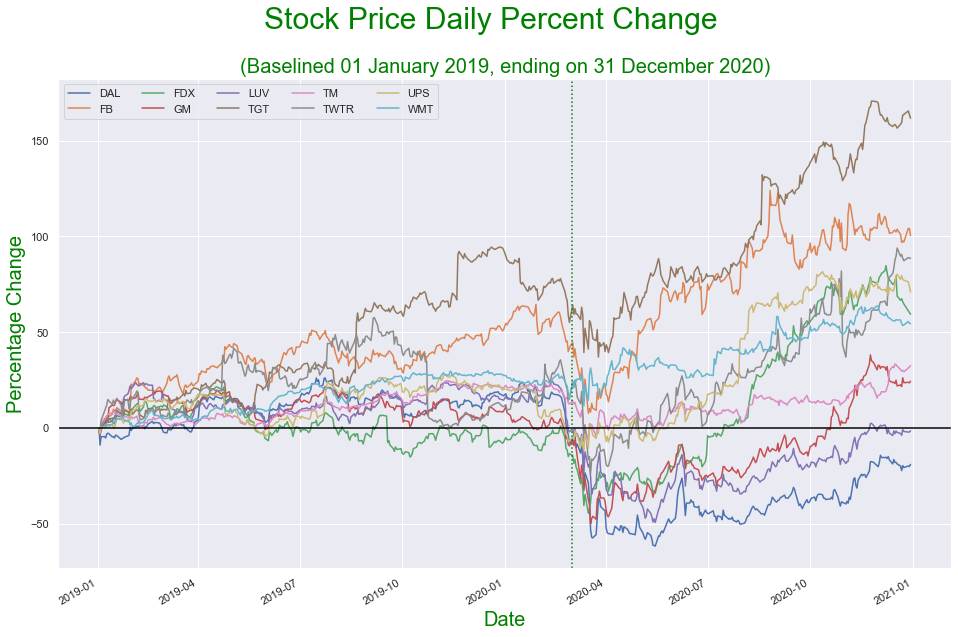

In [15]:
sns.set()
# This graph shows how different stocks did in relation to each other 
# using percentages, not absolute numbers.  
returns.plot(figsize=(16,10)).axhline(y=0, color="black")
plt.axvline(x='2020-03-1', color="green", linestyle='dotted')
plt.legend(ncol=5, loc="upper left")
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='upper right',
           #ncol=5, mode="expand", borderaxespad=0.)
plt.ylabel("Percentage Change", fontsize=20, color='green')
plt.xlabel("Date", fontsize=20, color='green')
plt.suptitle("Stock Price Daily Percent Change", fontsize=30, color='green')
plt.title(f'(Baselined {startString}, ending on {endString})', fontsize=20, color='green')
plt.savefig(f'{startString} - {endString}/All Stocks Percent Change {startString} - {endString}')
plt.show()